The aim is to train a neural network that will detect whether the movie review is positive or negative. This problem is popularly known as sentiment analysis. For training the neural network, IMDB dataset is used. IMDB dataset has 50K reviews which are divided equally into train and test set. Each set contains equal numbers of poitive and negative reviews.

IMDB dataset is provided with the keras so, you can directly use it without downloading it separately.

Also note that this is a binary classification problem.

In [1]:
# import the dataset
from keras.datasets import imdb

# load the data using load_data()
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.
/home/vibhanshu/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vibhanshu/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Note that the argument num_words=10000 means that only top 10K, frequently occuring words from the dataset. The reason for picking only top 10K words is that, the vector size will not be very large.

The data is encoded as Numpy arrays. Let's look at the shape and length of these arrays.

In [2]:
print('The shape of the training data: ', train_data.shape)
print('The shape of the training labels: ', train_labels.shape)
print('The shape of the testing data: ', test_data.shape)
print('The shape of the testing labels: ', test_labels.shape)
print('The length of the training data: ', len(train_data))
print('The length of the training labels: ', len(train_labels))
print('The length of the testing data: ', len(test_data))
print('The length of the testing labels: ', len(test_labels))

The shape of the training data:  (25000,)
The shape of the training labels:  (25000,)
The shape of the testing data:  (25000,)
The shape of the testing labels:  (25000,)
The length of the training data:  25000
The length of the training labels:  25000
The length of the testing data:  25000
The length of the testing labels:  25000


It can be seen that the length of train_data and test_data is 25000, that means it has 25000 reviews data. The length of train_labels and test_labels is also 25000 which is obvious as each data point corresponds to a single label. Now, let's look at the contents of the label. You will find that the labels are in the form of 0s and 1s. 0 stands for negative review while 1 stands for positive review.

In [3]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [4]:
test_labels

array([0, 1, 1, ..., 0, 0, 0])

Since, the train_data and test_data contains the numbers, they can be converted back to sentences.

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

Here, word_index is a dictionary that stores the mappings of words with the numbers.
reverse_word_index stores the reverse dictionary.

decoded_review stores the review in english for train_data[0]. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

Now let's first build our neural network (or the model) for this classification task. Then the above data will be fed to the model and lastly, the model will be tested on the test data to see if the model is correctly trained.

In [6]:
# import models and layers to define the model
from keras import models
from keras import layers

# sequential network is used
model = models.Sequential()

# add 3 layers
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

``` model = models.Sequential() ``` means that the model used is Sequential. Other types of models are also there. We will look into them in other tutorials.

``` model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) ``` means that the first layer that we have added is of type Dense and it contains 16 units. They are Densely connected (also known as fully connected layers). The activation function used is relu (Rectilinear unit). The shape of the input to this layer is of the form (10000,). The number 10000 is the input_shape because 10000 most frequent words are used only.

``` model.add(layers.Dense(16, activation='relu')) ``` means that the next layer that we have added is of type Dense and it contains 16 units. We are not required to add input_shape argument from second layer onwards, keras will understand the input_shape itself from the first layer's architecture.

```model.add(layers.Dense(1, activation='sigmoid')) ``` this is the final layer. The activation function used is sigmoid. Sigmoid function is used because it outputs either 1 or 0, which is required for one class classification or the binary classification.

Now, let's compile the model by using appropriate optimizer, loss function and evaluation metric.

In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

The model is ready now. We'll just need to feed the data into the model. The list of integers cannot be fed into the model directly. Integers needs to be converted into tensors. One way is to pad each review so that all have the same length and then using embedding layer that can take these integers directly. But, let's do it in other way. One-hot encode (only one value in each row is 1 and rest are 0s) the data so that it is in the form of 0 and 1. This data can directly be fed into the first layer of the network.

In [8]:
import numpy as np

def vectorize_sequence(sequences, dimesion=10000): 
    # dimension=10000 because we have used 10000 words only while loading the data
    results = np.zeros((len(sequences), dimesion))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
print(x_train[0])

# convert your binary labels to float
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

[0. 1. 1. ... 0. 0. 0.]


To see if the model is overfitting or not, let's keep a validation set of size 10K as well.

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Our data is ready, now let's train the model for 20 epochs. The fit function returns the history object which conatins a history dictionary. This dictionary conatins all the information of each epoch.

In [10]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

# values in the history dictionary
history_dict = history.history
print(history_dict.keys())

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 250s 17ms/step - loss: 0.5090 - acc: 0.7815 - val_loss: 0.3793 - val_acc: 0.8693
Epoch 2/20
15000/15000 [==============================] - 5s 325us/step - loss: 0.3006 - acc: 0.9049 - val_loss: 0.3003 - val_acc: 0.8894
Epoch 3/20
 1536/15000 [==>...........................] - ETA: 11s - loss: 0.2227 - acc: 0.9329

/home/vibhanshu/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200786). Check your callbacks.
  % delta_t_median)
/home/vibhanshu/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101019). Check your callbacks.
  % delta_t_median)


15000/15000 [==============================] - 4s 266us/step - loss: 0.2180 - acc: 0.9285 - val_loss: 0.3082 - val_acc: 0.8720
Epoch 4/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.1751 - acc: 0.9434 - val_loss: 0.2837 - val_acc: 0.8836
Epoch 5/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.1426 - acc: 0.9542 - val_loss: 0.2842 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 203us/step - loss: 0.1150 - acc: 0.9652 - val_loss: 0.3140 - val_acc: 0.8779
Epoch 7/20
15000/15000 [==============================] - 3s 215us/step - loss: 0.0978 - acc: 0.9707 - val_loss: 0.3128 - val_acc: 0.8843
Epoch 8/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.0806 - acc: 0.9765 - val_loss: 0.3861 - val_acc: 0.8651
Epoch 9/20
15000/15000 [==============================] - 3s 214us/step - loss: 0.0660 - acc: 0.9821 - val_loss: 0.3638 - val_acc: 0.8779
Epoch 10/20
15000/15000 [====================

To see the loss, validation loss, accuracy and validation accuracy we can use the history object. The plot can give us the better understanding about it. Let's use matplotlib to plot this data

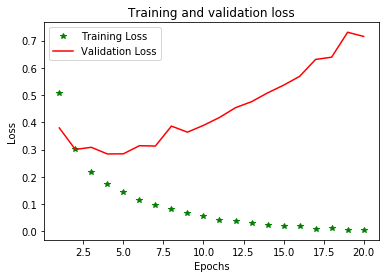

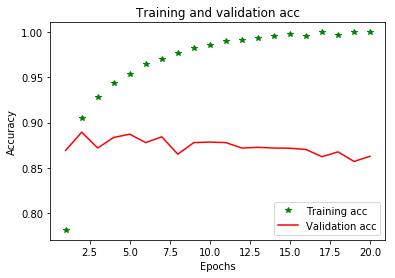

In [15]:
import matplotlib.pyplot as plt

# following line contains a 'magic function' to plot figures on jupyter notebooks
%matplotlib inline 

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(0)
plt.plot(epochs, loss_values, 'g*', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(epochs, acc_values, 'g*', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy should increase and loss should decrease after every iteration which can be clearly observed in training loss and training accuracy. In case of validation accuracy and validation loss, it is not following the above thing. So, we can clearly say that this model overfits. It can be observed that the model overfits by looking at the graph by observing the the validation loss increases after 4 epochs (we are overtraining). So, now let's run the model only for 4 epochs.

In [16]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 68s 3ms/step - loss: 0.2141 - acc: 0.9464
Epoch 2/4
25000/25000 [==============================] - 4s 147us/step - loss: 0.1403 - acc: 0.9582
Epoch 3/4
25000/25000 [==============================] - 4s 148us/step - loss: 0.1106 - acc: 0.9671
Epoch 4/4
25000/25000 [==============================] - 4s 143us/step - loss: 0.0890 - acc: 0.9719


Now, let's run this model on test set.

In [17]:
results = model.evaluate(x_test, y_test)
print(results)

# let's print the likelihood of each result being positive and negative
print(model.predict(x_test))

25000/25000 [==============================] - 152s 6ms/step
[0.5074406214666367, 0.85832]
[[0.02058934]
 [0.9999993 ]
 [0.9990823 ]
 ...
 [0.18358263]
 [0.14982063]
 [0.75615746]]


This model has achieved 85.8% test accuracy.